## Discriminator | Convolutional Neural Network

We use cifar10 dataset 





[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day02/Practice07_Discriminator_CNN_cifar10.ipynb)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import (
    Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape, MaxPooling2D)

from keras.layers.advanced_activations import LeakyReLU 

from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D
from keras.utils.vis_utils import plot_model

from keras.datasets import cifar10

pd.set_option('display.max_columns', 32)

In [2]:
img_rows = 32
img_cols = 32
channels = 3

img_shape = (img_rows, img_cols, channels)    

In [3]:
def build_discriminator(img_shape):

    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same'))

    #model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))

    #model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    #model.add(MaxPooling2D(pool_size=2, strides=None, padding='valid'))

    model.add(Flatten())                        

    model.add(Dense(1, activation='sigmoid'))


    return model

In [ ]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
discriminator.summary()
plot_model(discriminator, to_file='model.png', show_shapes=True)


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### cifar10_labels

0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'

In [ ]:
def show_img(img_set, index):
  pos = 1
  i = index
  # draw cifar10 images and label names
  fig = plt.figure(figsize=(16,10))
  for img in img_set:
    
    plt.subplot(6, 10, pos)
    plt.imshow(img)
    plt.axis('off')# to hide tick values on X and Y axis
    plt.title( i )
    pos += 1
    i += 1
  plt.show()
  plt.close()

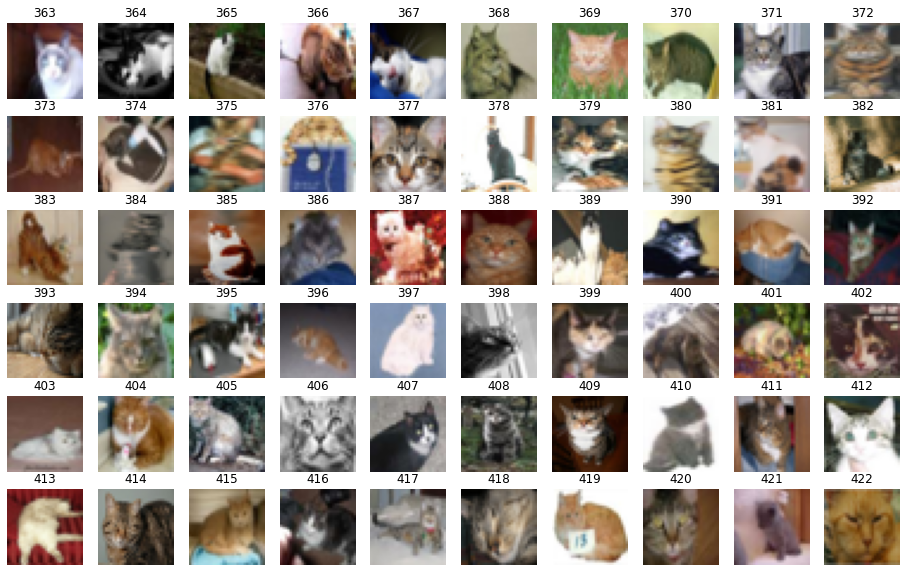

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
char = 3
X_train = X_train[(y_train == char ).flatten()]  

index = random.randint(0, X_train.shape[0]/2)
i = index
img_set = X_train[index:index+60]

show_img(img_set, index)

In [ ]:
X_train.shape

(5000, 32, 32, 3)

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(batch_size, sample_interval, n_epochs = 10):

    # Load the cifar10 dataset
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    char = 3 #True image
    X_train_a = X_train[(y_train == char ).flatten()]    

    char = 5 #Fake image
    X_train_b = X_train[(y_train == char ).flatten()]  

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train_a = X_train_a / 127.5 - 1.0
    X_train_b = X_train_b / 127.5 - 1.0
   # X_train = np.expand_dims(X_train, axis=3)

    #
    bat_per_epo = int((X_train_a.shape[0] + X_train_b.shape[0]) / batch_size)
    half_batch = int(batch_size / 2)

    #print(bat_per_epo, half_batch )
    # Labels for real images: all ones
    real = np.ones((half_batch, 1))
    # Labels for fake images: all zeros
    fake = np.zeros((half_batch, 1))
    
    #bat_per_epo = 10

    for i in range(n_epochs):
        for j in range(bat_per_epo):

          # -------------------------
          #  Train the Discriminator
          # -------------------------

          # Get a random batch of real images
          idx = np.random.randint(0, X_train_a.shape[0], half_batch)
          imgs = X_train_a[idx]

          # Get a random batch of fake images
          idx = np.random.randint(0, X_train_b.shape[0], half_batch)
          fake_img = X_train_b[idx]

          # Generate a batch of fake images　(random noize of [-1 1])
          #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
          #fake_img = np.zeros((batch_size, 28, 28)) -1.0
          #print(fake_img.shape)

          # Train Discriminator
          d_loss_real = discriminator.train_on_batch(imgs, real)
          d_loss_fake = discriminator.train_on_batch(fake_img , fake)
        # print(d_loss_real, d_loss_fake)
          d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)


          if (i*10 +  j + 1) % sample_interval == 0 :

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(i*10 +  j + 1)

            # Output training progress
            print("Epoch:%d %d/%d [D loss: %f, acc.: %.2f%%]" %
                  (i + 1, j+1, bat_per_epo, d_loss, 100.0 * accuracy))
    
 

In [ ]:
discriminator.metrics_names

['loss', 'accuracy']

In [ ]:
# Set hyperparameters
batch_size = 128
sample_interval = 50

# Train the Discriminator for the specified number of iterations
train(batch_size, sample_interval)

In [ ]:
(X_train, y_train), (X_test, y_test) =  cifar10.load_data()
char = 3 #True image: A label for A is "1"
X_test_a = X_test[(y_test == char ).flatten()]    
y_test_a = y_test[(y_test == char ).flatten()]  
y_test_a = np.ones((y_test_a.shape[0], 1))

char = 5 #Fake image: A label for B is "0"
X_test_b = X_test[(y_test == char ).flatten()]  
y_test_b = y_test[(y_test == char ).flatten()]  
y_test_b = np.zeros((y_test_b.shape[0], 1))



In [ ]:
X_test_a.shape

In [ ]:
_, accuracy = discriminator.evaluate(X_test_a, y_test_a)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

In [ ]:
_, accuracy = discriminator.evaluate(X_test_b, y_test_b)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

In [ ]:
#fake_img = np.zeros((batch_size, 28, 28)) -1
 #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
(X_train, _), (X_test, _) =  cifar10.load_data()
char = 3 #True image
X_test_a = X_test[(y_test == char ).flatten()]    

char = 5 #Fake image
X_test_b = X_test[(y_test == char ).flatten()]  

test_size = 10

#### test : real image
idx = np.random.randint(0, X_test_a.shape[0], test_size)
imgs_a = X_test_a[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_a[i])

y = discriminator.predict(imgs_a)
print(y)

false = np.where(y<=0.5)
print(false)


#### test : fake image
idx = np.random.randint(0, X_test_b.shape[0], test_size)
imgs_b = X_test_b[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_b[i])

y = discriminator.predict(imgs_b)
print(y)
false = np.where(y>=0.5)
print(false)

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")


plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()